In [2]:
import metview as mv
import datetime
from ecmwf.opendata import Client

In [3]:
filename = "medium-2t-wind.grib"

## Reading and processing the data
Now we can use **Metview's read() function** to read the files.

In [4]:
data = mv.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [5]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20250904,0,6,None,165,od,oper,fc,0001
10v,heightAboveGround,10,20250904,0,6,None,166,od,oper,fc,0001
2t,heightAboveGround,2,20250904,0,6,None,167,od,oper,fc,0001
max_2t,heightAboveGround,2,20250904,0,6,None,237167,od,oper,fc,0001
min_2t,heightAboveGround,2,20250904,0,6,None,238167,od,oper,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [6]:
data.describe('2t')

shortName,2t
name,2 metre temperature
paramId,167
units,K
typeOfLevel,heightAboveGround
level,2
date,20250904
time,0
step,6
number,None
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [7]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,max_2t,heightAboveGround,2,20250904,0,3-6,fc,None,regular_ll
1,ecmf,min_2t,heightAboveGround,2,20250904,0,3-6,fc,None,regular_ll
2,ecmf,10u,heightAboveGround,10,20250904,0,6,fc,None,regular_ll
3,ecmf,10v,heightAboveGround,10,20250904,0,6,fc,None,regular_ll
4,ecmf,2t,heightAboveGround,2,20250904,0,6,fc,None,regular_ll


The grib file contains all the parameters, and we will use the **select()** function to filter what we need.  
Feel free to use **describe()** to inspect the other filtered fields.

In [8]:
t2m = data.select(shortName= "2t")
u = data.select(shortName= "10u")
v = data.select(shortName= "10v")

t2m.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
2t,heightAboveGround,2,20250904,0,6,None,167,od,oper,fc,0001


We need to convert the temperature from Kelvin to Celsius

In [9]:
t2m -= 273.15

We need to create a wind vector field for the visualisation, as well.

In [10]:
wind_vector = mv.grib_vectors(u_component = u, v_component = v)

And finally, we can plot the data on the map. 

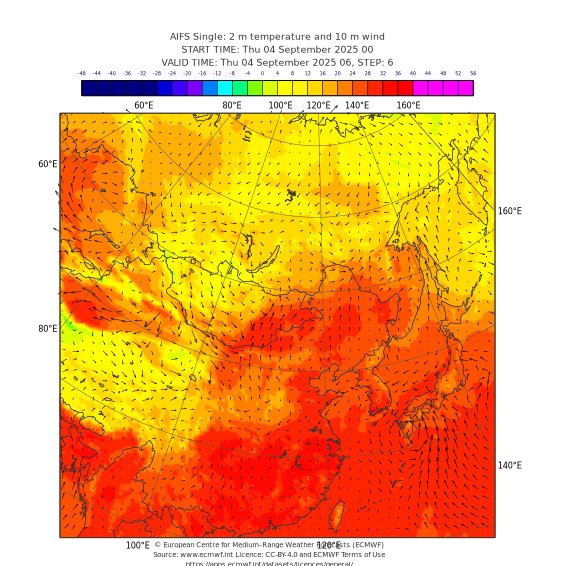

In [13]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="cream",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="eastern_asia",
    coastlines=coast
)

#define styles
t2m_shade = mv.mcont(legend= "on",
                contour_automatics_settings = "style_name",
                contour_style_name = "sh_all_fM48t56i4")

wind_arrows = mv.mwind(
    wind_thinning_factor=5, wind_arrow_colour="black"
)

title = mv.mtext(
    text_lines = ["AIFS Single: 2 m temperature and 10 m wind",
                  "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=2t'/> ",
                  "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=2t' />, STEP: <grib_info key='step' where='shortName=2t'/>"],
    text_font_size = 0.4,
    text_colour = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines          = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                           "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                            "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, t2m, t2m_shade, wind_vector, wind_arrows, title, ecmwf_text)

To generate the png file you can run the following cell.

In [12]:
png = mv.png_output(
    output_name = "aifs_single_medium-2t-wind",    # specify relative or full path
    output_title = "aifs_single_medium-2t-wind",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, t2m, t2m_shade, wind_vector, wind_arrows, title, ecmwf_text)